In [1]:
# Clone COVID-19 data repository
!git clone https://github.com/CSSEGISandData/COVID-19.git


fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [2]:
import glob
import os
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

# Load all CSV files from the directory
true_deaths_dp = "C:\\Users\\zooma\\ECE 227\\Visualizations\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_deaths_US.csv"
simulation_deaths_dp = "C:\\Users\\zooma\\OneDrive\\Documents\\GitHub\\ECE-227\\us_simulation20220417.csv"
simulation_deaths_new_dp = "C:\\Users\\zooma\\OneDrive\\Documents\\GitHub\\ECE-227\\us_simulation20220417newparams.csv"

# Step 1 Read True and Simulated Deaths
true_deaths_df = pd.read_csv(true_deaths_dp)
simulation_deaths_df = pd.read_csv(simulation_deaths_dp)
simulation_deaths_new_df = pd.read_csv(simulation_deaths_new_dp)

# Step 2: Drop unnecessary columns
columns_to_drop_true = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
                   'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population']
columns_to_drop_sim = ['infections', 'hospitalizations', 'mean_r_t']

true_deaths_df.drop(columns=columns_to_drop_true, inplace=True) 
simulation_deaths_df.drop(columns=columns_to_drop_sim, inplace=True)
simulation_deaths_new_df.drop(columns=columns_to_drop_sim, inplace=True) 
 
# Step 3: Sum death counts across all states for each date
true_deaths_df = true_deaths_df.transpose()  # Transpose DataFrame 
true_deaths_df['total_deaths'] = true_deaths_df.sum(axis=1)  
 
# Step 4: Drop not necessaary columns  
true_deaths_df = true_deaths_df.iloc[:, [-1]] 

# Step 5: Filter data to include specific time range   
true_deaths_df.index = pd.to_datetime(true_deaths_df.index, format='%m/%d/%y')
true_deaths_df = true_deaths_df.loc['2020-02-04':'2022-04-17']
true_daily_deaths = true_deaths_df['total_deaths'].diff()  # get daily deaths from accum deaths

simulation_deaths_df['# dates'] = pd.to_datetime(simulation_deaths_df['# dates'])
simulation_deaths_df.set_index('# dates', inplace=True)
simulation_deaths_df = simulation_deaths_df.loc['2020-02-01':'2022-04-17']
sim_daily_deaths = simulation_deaths_df['deaths']

simulation_deaths_new_df['# dates'] = pd.to_datetime(simulation_deaths_new_df['# dates'])
simulation_deaths_new_df.set_index('# dates', inplace=True)
simulation_deaths_new_df = simulation_deaths_new_df.loc['2020-02-01':'2022-04-17']
sim_daily_deaths_new = simulation_deaths_new_df['deaths']


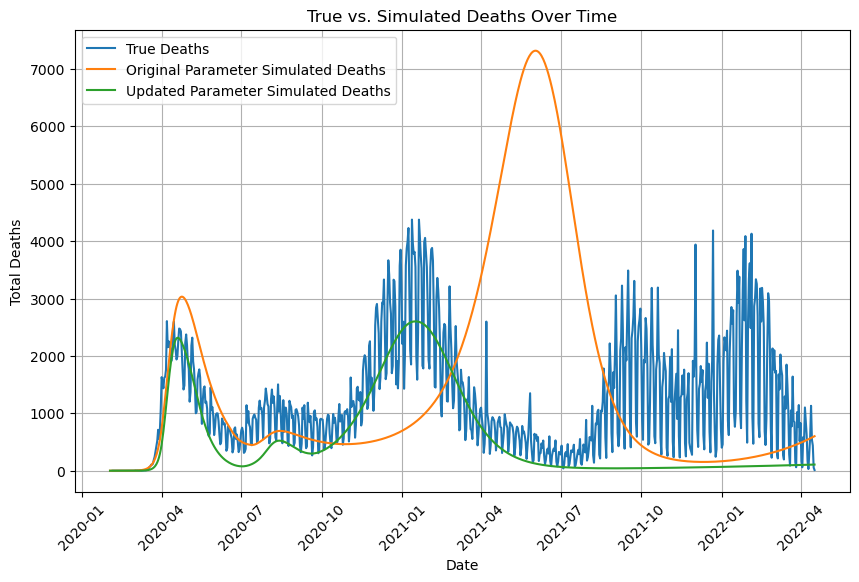

In [3]:
# Step 6: Plot the aggregated death data
plt.figure(figsize=(10, 6))
plt.plot(true_deaths_df.index[1:], true_daily_deaths[1:], label='True Deaths')
plt.plot(simulation_deaths_df.index[1:], sim_daily_deaths[1:], label='Original Parameter Simulated Deaths')
plt.plot(simulation_deaths_new_df.index[1:], sim_daily_deaths_new[1:], label='Updated Parameter Simulated Deaths')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('True vs. Simulated Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig('true_vs_simulated_deaths_over_time.png')
plt.show()
plt.show()